Github Link:https://github.com/srikanthreddypasunuri2020/logistic-regression-regularisation-tutorial.git

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
# Generate a non-linearly separable dataset
X, y = make_moons(n_samples=600, noise=0.25, random_state=42)

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 420
Testing samples: 180


Figure saved as decision_boundary.png


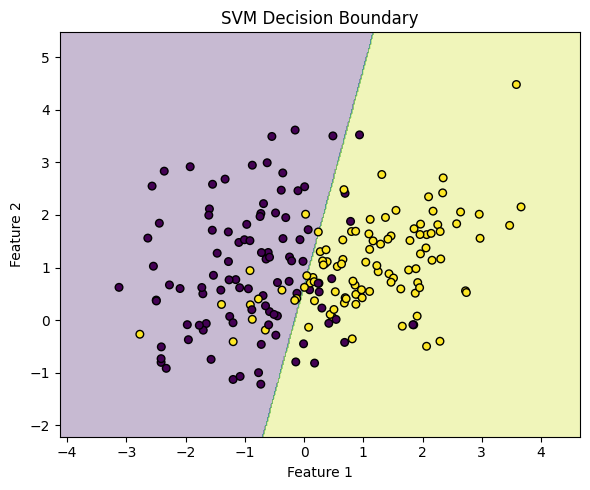

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test Accuracy: 0.85


In [14]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from google.colab import files

def plot_decision_boundary(model, X, y, title, filename=None):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=30)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()

    if filename:
        plt.savefig(filename, dpi=300, bbox_inches="tight")
        print(f"Figure saved as {filename}")
    plt.show()

# Create a synthetic dataset
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Plot decision boundary and save figure
plot_decision_boundary(model, X, y, "SVM Decision Boundary", filename="decision_boundary.png")

# Download figure from Colab
files.download("decision_boundary.png")

# Optional: Evaluate model
accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

In [4]:
C_values = [0.01, 0.1, 1, 10, 100]

train_accuracies = []
test_accuracies = []

models = {}

for C in C_values:
    model = LogisticRegression(C=C, solver='lbfgs')
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    models[C] = model

    print(f"C = {C:>6} | Train acc = {train_acc:.3f} | Test acc = {test_acc:.3f}")


C =   0.01 | Train acc = 0.793 | Test acc = 0.822
C =    0.1 | Train acc = 0.836 | Test acc = 0.850
C =      1 | Train acc = 0.862 | Test acc = 0.861
C =     10 | Train acc = 0.860 | Test acc = 0.861
C =    100 | Train acc = 0.860 | Test acc = 0.861


Figure saved as decision_boundary_C_0.01.png


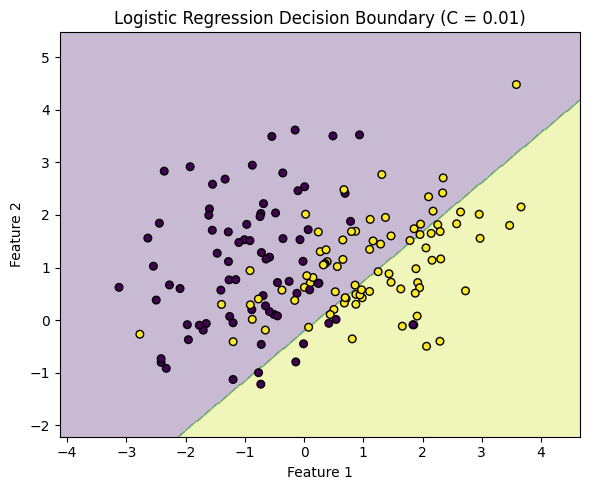

Figure saved as decision_boundary_C_0.1.png


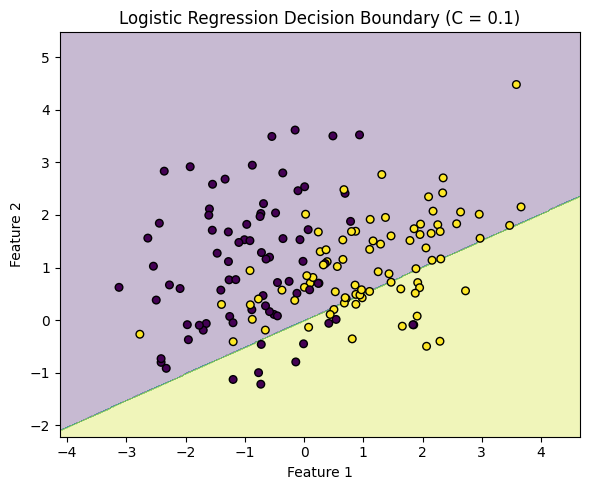

Figure saved as decision_boundary_C_1.png


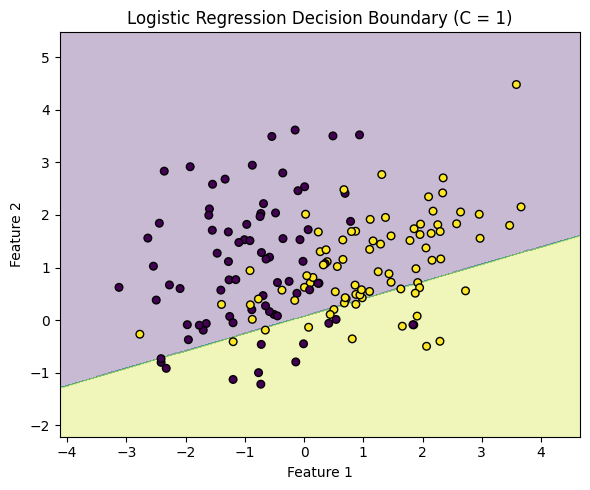

Figure saved as decision_boundary_C_10.png


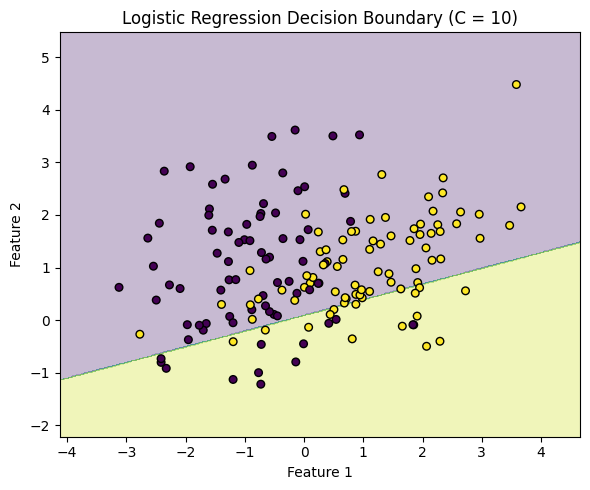

Figure saved as decision_boundary_C_100.png


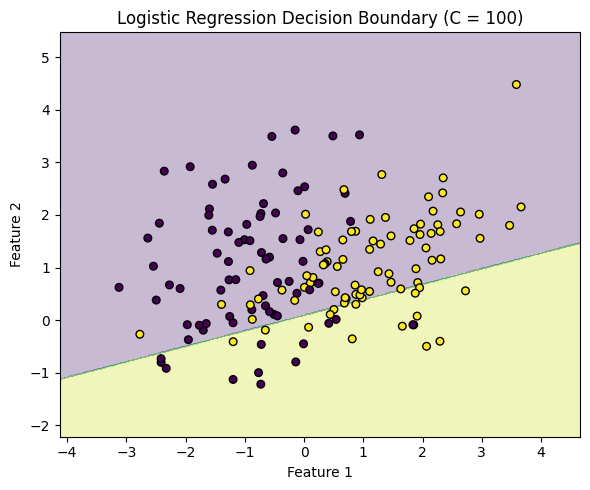

In [15]:
for C in C_values:
    plot_decision_boundary(
        models[C],
        X_train,
        y_train,
        title=f"Logistic Regression Decision Boundary (C = {C})",
        filename=f"decision_boundary_C_{C}.png"  # saves each figure uniquely
    )


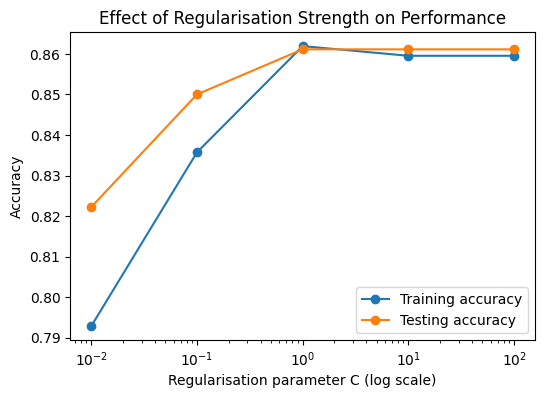

In [8]:
plt.figure(figsize=(6, 4))
plt.plot(C_values, train_accuracies, marker="o", label="Training accuracy")
plt.plot(C_values, test_accuracies, marker="o", label="Testing accuracy")
plt.xscale("log")
plt.xlabel("Regularisation parameter C (log scale)")
plt.ylabel("Accuracy")
plt.title("Effect of Regularisation Strength on Performance")
plt.legend()

plt.savefig("accuracy_vs_C.png", dpi=300, bbox_inches="tight")
plt.show()
